# 連續變數特徵工程

本作業將請學員完成以下要求：
1. 請至 Kaggle 平台找尋欲探索的資料集，進行本次作業。
2. 請執行至少兩種特徵縮放或特徵標準化方法，並繪製出直方圖探討執行前後數值特徵的變化。
3. 請執行特徵區間化，並說明您是使用哪一種標準決定數值範圍，每個類別的範圍分別為何。
4. 請使用至少三種不同的連續變數填補技巧，將遺失值填補完成。

> 請注意：本次作業需求目標與範例程式碼相同，加上開放題會因資料集個案有不同的處理技巧，因此不額外提供解答程式碼，學員如對本次作業有問題可參考範例程式碼，或至問題討論區提問。

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# 讓圖比較好看
plt.style.use("default")
sns.set(font_scale=1.0)

# 輸入資料
folder = r'D:\Github\ML100Days\\'
path = os.path.join(folder, 'train_house.csv')

raw_data = pd.read_csv(path)
data = raw_data.copy()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# 探索數據
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# 欄位型態
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# 目標欄位基本統計
data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

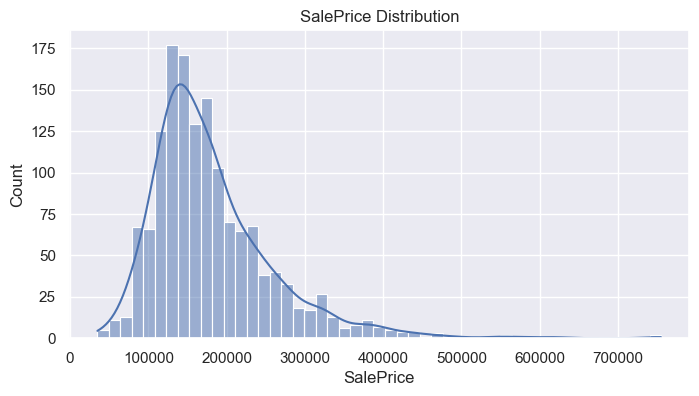

In [6]:
# SalePrice 分佈
plt.figure(figsize=(8, 4))
sns.histplot(data["SalePrice"], kde=True)
plt.title("SalePrice Distribution")
plt.show()

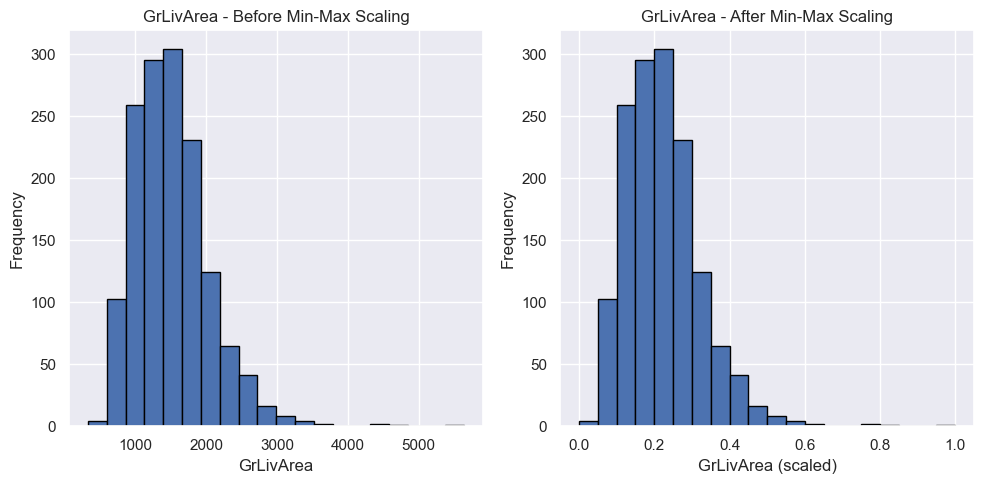

In [7]:
# ==================================================
# 2. 至少兩種特徵縮放 / 標準化，並畫直方圖比較前後變化
#    這裡以 GrLivArea（居住面積）為例
# ==================================================

# Min-Max 縮放
def min_max_scaling(s):
    return (s - s.min()) / (s.max() - s.min())

# Z-score 標準化
def z_score_standardization(s):
    return (s - s.mean()) / s.std()

# --- Min-Max 之前 / 之後 ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data['GrLivArea'].dropna(), bins=20, edgecolor='black')
plt.title('GrLivArea - Before Min-Max Scaling')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(min_max_scaling(data['GrLivArea'].dropna()), bins=20, edgecolor='black')
plt.title('GrLivArea - After Min-Max Scaling')
plt.xlabel('GrLivArea (scaled)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

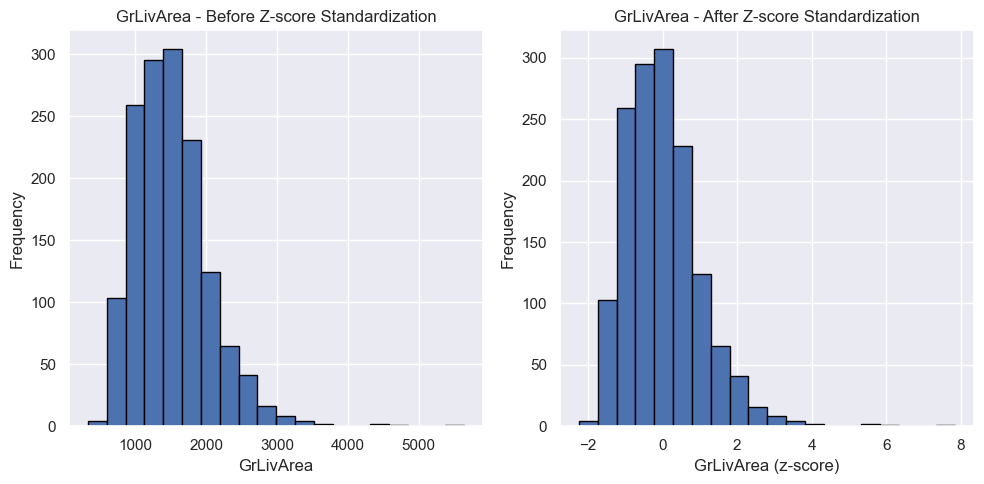

In [8]:
# --- Z-score 之前 / 之後 ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data['GrLivArea'].dropna(), bins=20, edgecolor='black')
plt.title('GrLivArea - Before Z-score Standardization')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(z_score_standardization(data['GrLivArea'].dropna()), bins=20, edgecolor='black')
plt.title('GrLivArea - After Z-score Standardization')
plt.xlabel('GrLivArea (z-score)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# ==================================================
# 3. 特徵區間化（Binning）
#    使用「等寬劃分」說明每個類別的範圍
#    這裡以 SalePrice 為例，分成 5 個區間
# ==================================================

# 等寬劃分（Equal-Width Binning）
def equal_width_binning(s, bins):
    return pd.cut(s, bins=bins, include_lowest=True, right=True)

# 使用等寬劃分，將 SalePrice 分為 5 個區間
data['SalePrice_EqualWidth'] = equal_width_binning(data['SalePrice'], bins=5)

# 看各區間範圍與筆數
print("SalePrice 等寬分 5 區間，區間範圍與筆數：")
print(data['SalePrice_EqualWidth'].value_counts().sort_index())

# 如果想再看等頻劃分，也可以額外做（非必須，但作業可以加分）
# 等頻劃分（Equal-Frequency Binning）
def equal_freq_binning(s, bins):
    return pd.qcut(s, q=bins, duplicates='drop')

data['SalePrice_EqualFreq'] = equal_freq_binning(data['SalePrice'], bins=5)

print("\nSalePrice 等頻分 5 區間，區間範圍與筆數：")
print(data['SalePrice_EqualFreq'].value_counts().sort_index())

SalePrice 等寬分 5 區間，區間範圍與筆數：
(34179.899000000005, 178920.0]    871
(178920.0, 322940.0]              508
(322940.0, 466960.0]               70
(466960.0, 610980.0]                7
(610980.0, 755000.0]                4
Name: SalePrice_EqualWidth, dtype: int64

SalePrice 等頻分 5 區間，區間範圍與筆數：
(34899.999, 124000.0]    295
(124000.0, 147000.0]     294
(147000.0, 179280.0]     287
(179280.0, 230000.0]     295
(230000.0, 755000.0]     289
Name: SalePrice_EqualFreq, dtype: int64


In [10]:
# ==================================================
# 4. 使用至少三種不同的連續變數填補技巧，完成遺失值填補
#    這邊示範：平均值 / 中位數 / 眾數，分別用在不同欄位
#    以 LotFrontage, GarageYrBlt, MasVnrArea 為例（這三個都有缺失值）
# ==================================================

print("\n缺失值筆數（填補前）：")
print(data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].isnull().sum())

# (1) LotFrontage 用「平均值」填補
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

# (2) GarageYrBlt 用「中位數」填補
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

# (3) MasVnrArea 用「眾數」填補
mas_mode = data['MasVnrArea'].mode()[0]
data['MasVnrArea'] = data['MasVnrArea'].fillna(mas_mode)

print("\n缺失值筆數（填補後）：")
print(data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].isnull().sum())


缺失值筆數（填補前）：
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

缺失值筆數（填補後）：
LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64
